In [1]:
# Introducción:Cargamos y/o importamos las librerías y recursos que vamos a utilizar.

import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# 1 - Cargar los datos y realizar un análisis exploratorio y una evaluación de la calidad de los datos necesarios para el resto del caso. Específicamente, evaluar la integridad, validez y actualidad de los datos y proponer estrategias de mitigación de los posibles problemas encontrados.

df = pd.read_csv('compas-scores.csv')

In [5]:
# Revisamos que se ha cargado correctamente. 

df.head(5)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,NaN,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14
1,2,michael ryan,michael,ryan,2014-12-31,Male,1985-02-06,31,25 - 45,Caucasian,...,NaN,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31
2,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27
3,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,NaN,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14
4,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,NaN,NaN,Risk of Violence,6,Medium,2013-01-13,Risk of Recidivism,8,High,2013-01-13


In [6]:
# Vemos que hay muchas columnas, por tanto, vamos a utilizar las necesarias para el trabajo.
# Haremos una copia, que será donde trabajaremos, para no ensuciar el df principal.

df_trabajo = df[['name', 'age', 'sex', 'race', 'compas_screening_date', 'decile_score','v_decile_score', 'is_recid', 'r_offense_date', 'is_violent_recid', 'vr_offense_date', 'priors_count']].copy()

In [8]:
# Revisamos que se ha realizado.

df_trabajo.head()


,name,age,sex,race,compas_screening_date,decile_score,v_decile_score,is_recid,r_offense_date,is_violent_recid,vr_offense_date,priors_count
0,miguel hernandez,69,Male,Other,2013-08-14,1,1,0,NaN,0,NaN,0
1,michael ryan,31,Male,Caucasian,2014-12-31,5,2,-1,NaN,0,NaN,0
2,kevon dixon,34,Male,African-American,2013-01-27,3,1,1,2013-07-05,1,2013-07-05,0
3,ed philo,24,Male,African-American,2013-04-14,4,3,1,2013-06-16,0,NaN,4
4,marcu brown,23,Male,African-American,2013-01-13,8,6,0,NaN,0,NaN,1


In [9]:
# Revisamos que type es cada columna.

df_trabajo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11757 entries, 0 to 11756
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   11757 non-null  object
 1   age                    11757 non-null  int64 
 2   sex                    11757 non-null  object
 3   race                   11757 non-null  object
 4   compas_screening_date  11757 non-null  object
 5   decile_score           11757 non-null  int64 
 6   v_decile_score         11757 non-null  int64 
 7   is_recid               11757 non-null  int64 
 8   r_offense_date         3703 non-null   object
 9   is_violent_recid       11757 non-null  int64 
 10  vr_offense_date        882 non-null    object
 11  priors_count           11757 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 1.1+ MB


In [10]:
# Devuelve el número de elementos distintos a lo largo de un determinado eje.

df_trabajo.nunique()

name                     11584
age                         66
sex                          2
race                         6
compas_screening_date      704
decile_score                11
v_decile_score              11
is_recid                     3
r_offense_date            1090
is_violent_recid             2
vr_offense_date            599
priors_count                39
dtype: int64

In [12]:
(df_trabajo.is_recid == -1).value_counts()

False    11038
True       719
Name: is_recid, dtype: int64

In [13]:
df_trabajo.drop(df_trabajo[df_trabajo.is_recid == -1].index, inplace=True)

In [14]:
df_trabajo.nunique()

name                     10902
age                         66
sex                          2
race                         6
compas_screening_date      704
decile_score                11
v_decile_score              11
is_recid                     2
r_offense_date            1090
is_violent_recid             2
vr_offense_date            599
priors_count                39
dtype: int64

In [15]:
df_trabajo.is_recid[df_trabajo.r_offense_date.isnull()].unique()

array([0], dtype=int64)

In [16]:
df_trabajo.is_violent_recid[df_trabajo.vr_offense_date.isnull()].unique()


array([0], dtype=int64)

In [17]:
df_trabajo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11038 entries, 0 to 11756
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   11038 non-null  object
 1   age                    11038 non-null  int64 
 2   sex                    11038 non-null  object
 3   race                   11038 non-null  object
 4   compas_screening_date  11038 non-null  object
 5   decile_score           11038 non-null  int64 
 6   v_decile_score         11038 non-null  int64 
 7   is_recid               11038 non-null  int64 
 8   r_offense_date         3703 non-null   object
 9   is_violent_recid       11038 non-null  int64 
 10  vr_offense_date        882 non-null    object
 11  priors_count           11038 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 1.1+ MB


In [18]:
df_trabajo.nunique()

name                     10902
age                         66
sex                          2
race                         6
compas_screening_date      704
decile_score                11
v_decile_score              11
is_recid                     2
r_offense_date            1090
is_violent_recid             2
vr_offense_date            599
priors_count                39
dtype: int64

In [19]:
# Vemos los nombres y apellidos que están duplicados.

df_trabajo[df_trabajo.duplicated(['name','age'], keep=False)].sort_values(by = 'name')

,name,age,sex,race,compas_screening_date,decile_score,v_decile_score,is_recid,r_offense_date,is_violent_recid,vr_offense_date,priors_count
7707,jeffrey williams,28,Male,African-American,2013-04-16,6,6,0,NaN,0,NaN,6
10164,jeffrey williams,28,Male,African-American,2014-06-25,2,2,1,2014-09-19,0,NaN,5
1004,john brown,65,Male,African-American,2014-04-11,2,1,1,2015-09-04,1,2015-09-04,2
11713,john brown,65,Male,African-American,2013-09-23,1,1,0,NaN,0,NaN,1
949,michael williams,23,Male,African-American,2013-05-24,10,8,0,NaN,0,NaN,4
10537,michael williams,23,Male,African-American,2013-01-26,6,6,0,NaN,0,NaN,1
3491,roderick thomas,23,Male,African-American,2014-03-10,7,5,0,NaN,0,NaN,3
7476,roderick thomas,23,Male,African-American,2013-02-12,8,5,0,NaN,0,NaN,1
112,troy smith,22,Male,African-American,2013-08-25,3,3,1,2014-10-06,0,NaN,1
2022,troy smith,22,Male,African-American,2013-03-22,7,6,0,NaN,0,NaN,4


In [20]:
# Convertimos los tipos.

df_trabajo['name'] = df_trabajo['name'].astype('string')
df_trabajo['sex'] = df_trabajo['sex'].astype('category')
df_trabajo['race'] = df_trabajo['race'].astype('category')
df_trabajo['is_recid'] = df_trabajo['is_recid'].astype('category')
df_trabajo['is_violent_recid'] = df_trabajo['is_violent_recid'].astype('category')
df_trabajo['compas_screening_date'] = pd.to_datetime(df_trabajo['compas_screening_date'])
df_trabajo['r_offense_date'] = pd.to_datetime(df_trabajo['r_offense_date'])
df_trabajo['vr_offense_date'] = pd.to_datetime(df_trabajo['vr_offense_date'])

In [21]:
# Revisamos si las conversiones se han realizado de manera satisfactoria.

df_trabajo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11038 entries, 0 to 11756
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   11038 non-null  string        
 1   age                    11038 non-null  int64         
 2   sex                    11038 non-null  category      
 3   race                   11038 non-null  category      
 4   compas_screening_date  11038 non-null  datetime64[ns]
 5   decile_score           11038 non-null  int64         
 6   v_decile_score         11038 non-null  int64         
 7   is_recid               11038 non-null  category      
 8   r_offense_date         3703 non-null   datetime64[ns]
 9   is_violent_recid       11038 non-null  category      
 10  vr_offense_date        882 non-null    datetime64[ns]
 11  priors_count           11038 non-null  int64         
dtypes: category(4), datetime64[ns](3), int64(4), string(1)
memor

In [22]:
df_trabajo.head()

,name,age,sex,race,compas_screening_date,decile_score,v_decile_score,is_recid,r_offense_date,is_violent_recid,vr_offense_date,priors_count
0,miguel hernandez,69,Male,Other,2013-08-14,1,1,0,NaT,0,NaT,0
2,kevon dixon,34,Male,African-American,2013-01-27,3,1,1,2013-07-05,1,2013-07-05,0
3,ed philo,24,Male,African-American,2013-04-14,4,3,1,2013-06-16,0,NaT,4
4,marcu brown,23,Male,African-American,2013-01-13,8,6,0,NaT,0,NaT,1
5,bouthy pierrelouis,43,Male,Other,2013-03-26,1,1,0,NaT,0,NaT,2


In [25]:
# 2 - ¿Son los campos “is_recid” e “is_violent_recid” en este conjunto de datos adecuados para evaluar la precisión de las estimaciones de riesgo generadas por elsistema COMPAS? Si no es así, deﬁnir y calcular una feature que sí lo sea.

cm =pd.crosstab(df_trabajo.is_recid==1, df_trabajo.decile_score>=7, rownames=['prediccion'],colnames=['real'])
from statsmodels.formula.api import ols


In [26]:
df_trabajo = df_trabajo[(df_trabajo.is_recid == 1) & (df_trabajo.decile_score >= 7)]

In [27]:
ﬁt_decile_score = ols('decile_score ~ age + priors_count + C(sex) + C(race) + C(is_recid) +C(is_violent_recid)', data=df_trabajo).ﬁt()

In [28]:
print(ﬁt_decile_score.summary()) # Escribiremos C si la variable es categórica.

                            OLS Regression Results                            
Dep. Variable:           decile_score   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     12.10
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           1.28e-18
Time:                        11:35:48   Log-Likelihood:                -2219.4
No. Observations:                1503   AIC:                             4459.
Df Residuals:                    1493   BIC:                             4512.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [29]:
# 3 - El umbral para establecer medidas preventivas de la reincidencia es de 7 en adelante. Dado este umbral, generar una tabla de contingencia, explicando qué caso se considera como “positivo” (y, por lo tanto, cuáles son los errores de tipo I y los errores de tipo II).

# 3.1 Con este comando hacemos una predicción del valor de decile_score a partir de los que hemos realizado antes.

prediccion = ﬁt_decile_score.predict(df_trabajo)

In [30]:
cm = pd.crosstab(prediccion>=7, df_trabajo.decile_score>=7, rownames=['prediccion'],colnames=['real'])

In [33]:
cm

real,True
prediccion,
True,1503


In [35]:
from sklearn.metrics import classiﬁcation_report

In [36]:
print(classiﬁcation_report(df_trabajo.decile_score>=7, prediccion>=7))

              precision    recall  f1-score   support

        True       1.00      1.00      1.00      1503

    accuracy                           1.00      1503
   macro avg       1.00      1.00      1.00      1503
weighted avg       1.00      1.00      1.00      1503



In [37]:
# 4 - El sistema asigna, de media, evaluaciones de riesgo más altas a los hombres que a las mujeres, y a las personas de raza afroamericana que a las de raza caucásica. Sin embargo, también las tasas de reincidencia son más altas para esos colectivos, aunque no está claro que la asignación de riesgo sea “justa” o no. Mostrar estas diferencias mediante representaciones gráficas y utilizarlas para analizar si la asignación de evaluaciones es justa o no.

# Se eliminan valores -1 de decile_score y v_decile_score para graﬁcar y ser más consistente.

df_trabajo = df_trabajo.drop(df_trabajo[df_trabajo['v_decile_score']==-1].index)
df_trabajo = df_trabajo.drop(df_trabajo[df_trabajo['decile_score']==-1].index)

In [38]:
import matplotlib.pyplot as plt

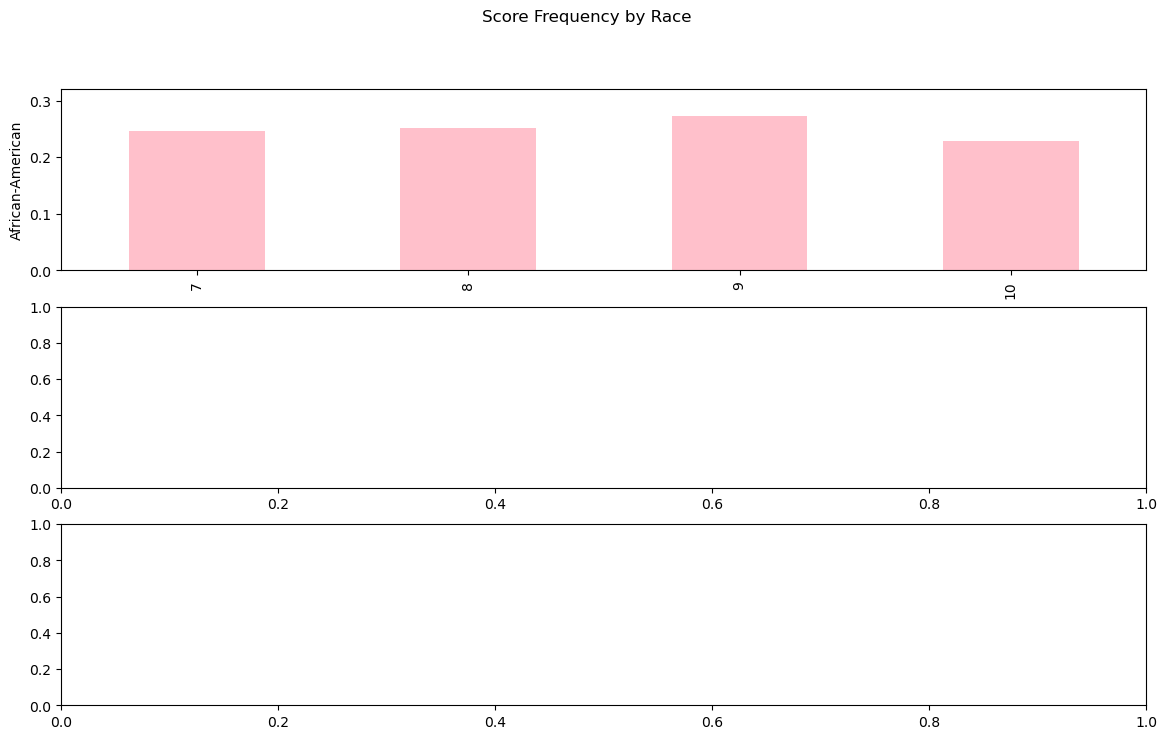

In [46]:
# Primera visualización: RACE

df_final = df_trabajo.groupby("race")
race_count = df_trabajo.groupby("race")["name"].count()

ﬁg, ax = plt.subplots(3, ﬁgsize=(14, 8))

for (i, race) in enumerate(["African-American", "Caucasian", "Hispanic"]):
    
    (df_final.get_group(race).groupby("decile_score")["name"].count() / race_count[race]).plot(kind="bar", ax=ax[i], color="pink")
    ax[i].set_ylabel(race)
    ax[i].set_xlabel("")
    ax[i].set_ylim(0, 0.32)
    ﬁg.suptitle("Score Frequency by Race")
    plt.show()
    

C:\Users\USER\AppData\Local\Temp\ipykernel_13196\2427213354.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax[i].set_ylim(0, 0.)


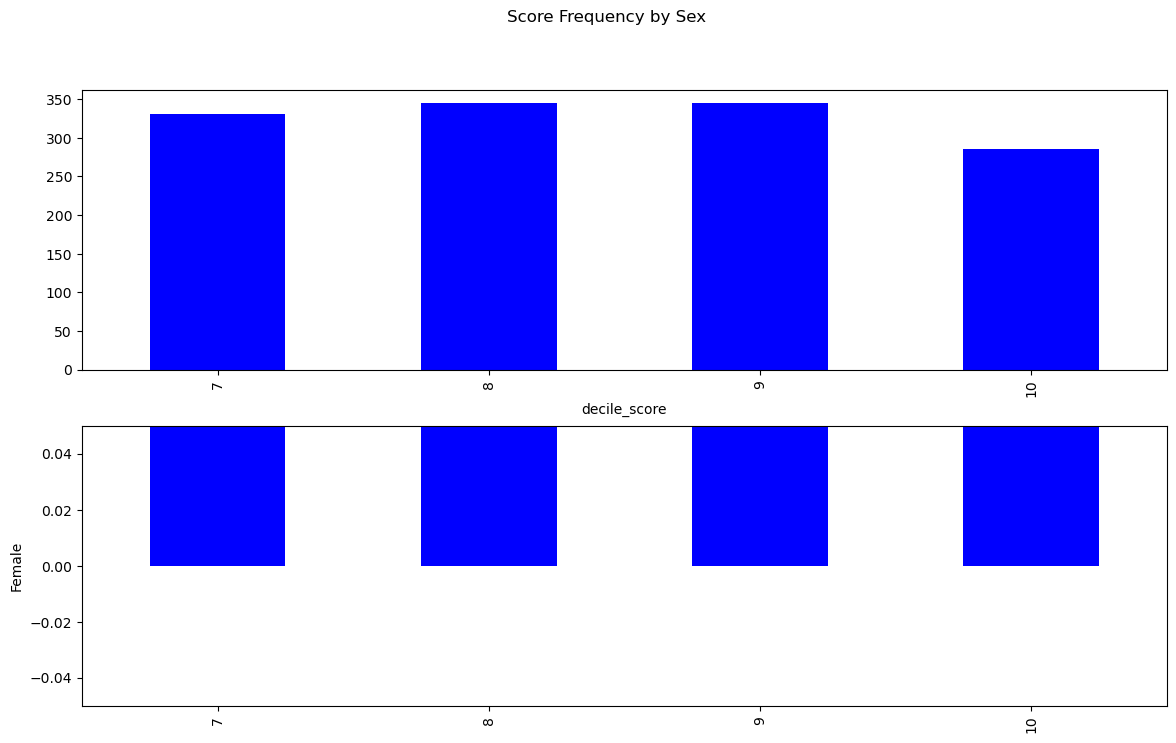

In [50]:
# Segunda visualización: SEX

df_final = df_trabajo.groupby("sex")
race_count = df_trabajo.groupby("sex")["name"].count()

ﬁg, ax = plt.subplots(2, ﬁgsize=(14, 8))

for (i, sex) in enumerate(["Male", "Female"]):
    
    (df_final.get_group(sex).groupby("decile_score")["name"].count()).plot(kind="bar", ax=ax[i], color="blue")

ax[i].set_ylabel(sex)
ax[i].set_xlabel("")
ax[i].set_ylim(0, 0.)

ﬁg.suptitle("Score Frequency by Sex")

plt.show()


In [52]:
# 5 - ¿Para qué tipo de riesgos, el de delitos generales o el de delitos violentos, tiene el sistema más capacidad predictiva?

# Aquí vamos a repetir lo que hemos hecho antes para decile_score pero para v_decile_score

ﬁt_v_decile_score = ols('v_decile_score ~ age + priors_count + C(sex) + C(race) + C(is_recid) + C(is_violent_recid)', data=df_trabajo).ﬁt()

In [53]:
# Escribiremos C() si la variable es categórica.

print(ﬁt_v_decile_score.summary())

                            OLS Regression Results                            
Dep. Variable:         v_decile_score   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     60.80
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           5.80e-95
Time:                        12:08:35   Log-Likelihood:                -3127.1
No. Observations:                1503   AIC:                             6274.
Df Residuals:                    1493   BIC:                             6327.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [54]:
# Con este comando se hace una predicción del valor de decile_score a partir de los quehemos indicado antes.

vprediccion = ﬁt_v_decile_score.predict(df_trabajo)

In [56]:
# Generamos la tabla de contingencia, comparando los casos en los que se predice.

# Un valor mayor que 7, con aquellos en los que realmente es mayor que 7.

cm = pd.crosstab(vprediccion>=7, df_trabajo.v_decile_score>=7, rownames=['prediccion'],colnames=['real'])

In [57]:
cm

real,False,True
prediccion,,
False,619,368
True,130,386


In [59]:
print(classiﬁcation_report(df_trabajo.v_decile_score>=7, vprediccion>=7))

              precision    recall  f1-score   support

       False       0.63      0.83      0.71       749
        True       0.75      0.51      0.61       754

    accuracy                           0.67      1503
   macro avg       0.69      0.67      0.66      1503
weighted avg       0.69      0.67      0.66      1503

